$\rho = \frac{N}{L^2}$

$N = \rho L^2$

# Comparison of log- to linspace, given a specific density.

[0, 40, 80, 121, 161, 202, 242, 282, 323, 363, 404, 444, 484, 525, 565, 606, 646, 686, 727, 767, 808, 848, 888, 929, 969, 1010, 1050, 1090, 1131, 1171, 1212, 1252, 1292, 1333, 1373, 1414, 1454, 1494, 1535, 1575, 1616, 1656, 1696, 1737, 1777, 1818, 1858, 1898, 1939, 1979, 2020, 2060, 2101, 2141, 2181, 2222, 2262, 2303, 2343, 2383, 2424, 2464, 2505, 2545, 2585, 2626, 2666, 2707, 2747, 2787, 2828, 2868, 2909, 2949, 2989, 3030, 3070, 3111, 3151, 3191, 3232, 3272, 3313, 3353, 3393, 3434, 3474, 3515, 3555, 3595, 3636, 3676, 3717, 3757, 3797, 3838, 3878, 3919, 3959, 4000]
[40, 41, 43, 45, 48, 50, 52, 55, 58, 60, 63, 66, 69, 73, 76, 80, 84, 88, 92, 96, 101, 106, 111, 116, 122, 127, 134, 140, 147, 154, 161, 169, 177, 185, 194, 203, 213, 223, 234, 245, 257, 269, 282, 295, 309, 324, 339, 356, 373, 390, 409, 428, 449, 470, 493, 516, 541, 566, 593, 622, 651, 682, 715, 749, 785, 822, 861, 902, 945, 990, 1038, 1087, 1139, 1193, 1250, 1309, 1372, 1437, 1505, 1577, 1652, 1731, 1813, 1900, 1990, 2085, 2

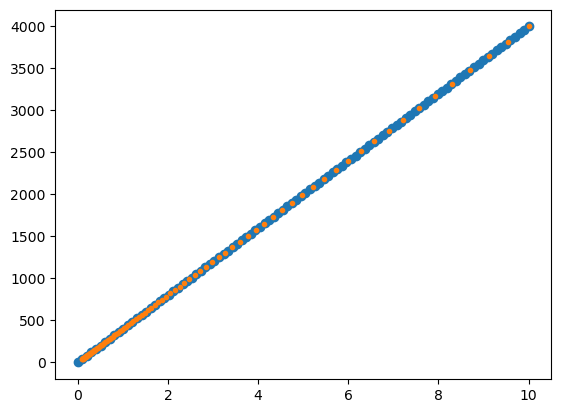

In [1]:
import numpy as np
import matplotlib.pyplot as plt


N = 50
L = 20
densities = np.linspace(0, 10, 100)
densitiesLog = np.logspace(-1, 1, 100)
numberParticles = []
numberParticlesLog = []
for density in densities:
    numberParticles.append(int(density * L**2))
for density in densitiesLog:
    numberParticlesLog.append(int(density * L**2))
    
    
print(numberParticles)
print(numberParticlesLog)

plt.plot(densities, numberParticles, 'o', label="Linspace")
plt.plot(densitiesLog, numberParticlesLog, '.', label="Logspace")

plt.show()

# Density vs order parameter plot for several noise values.

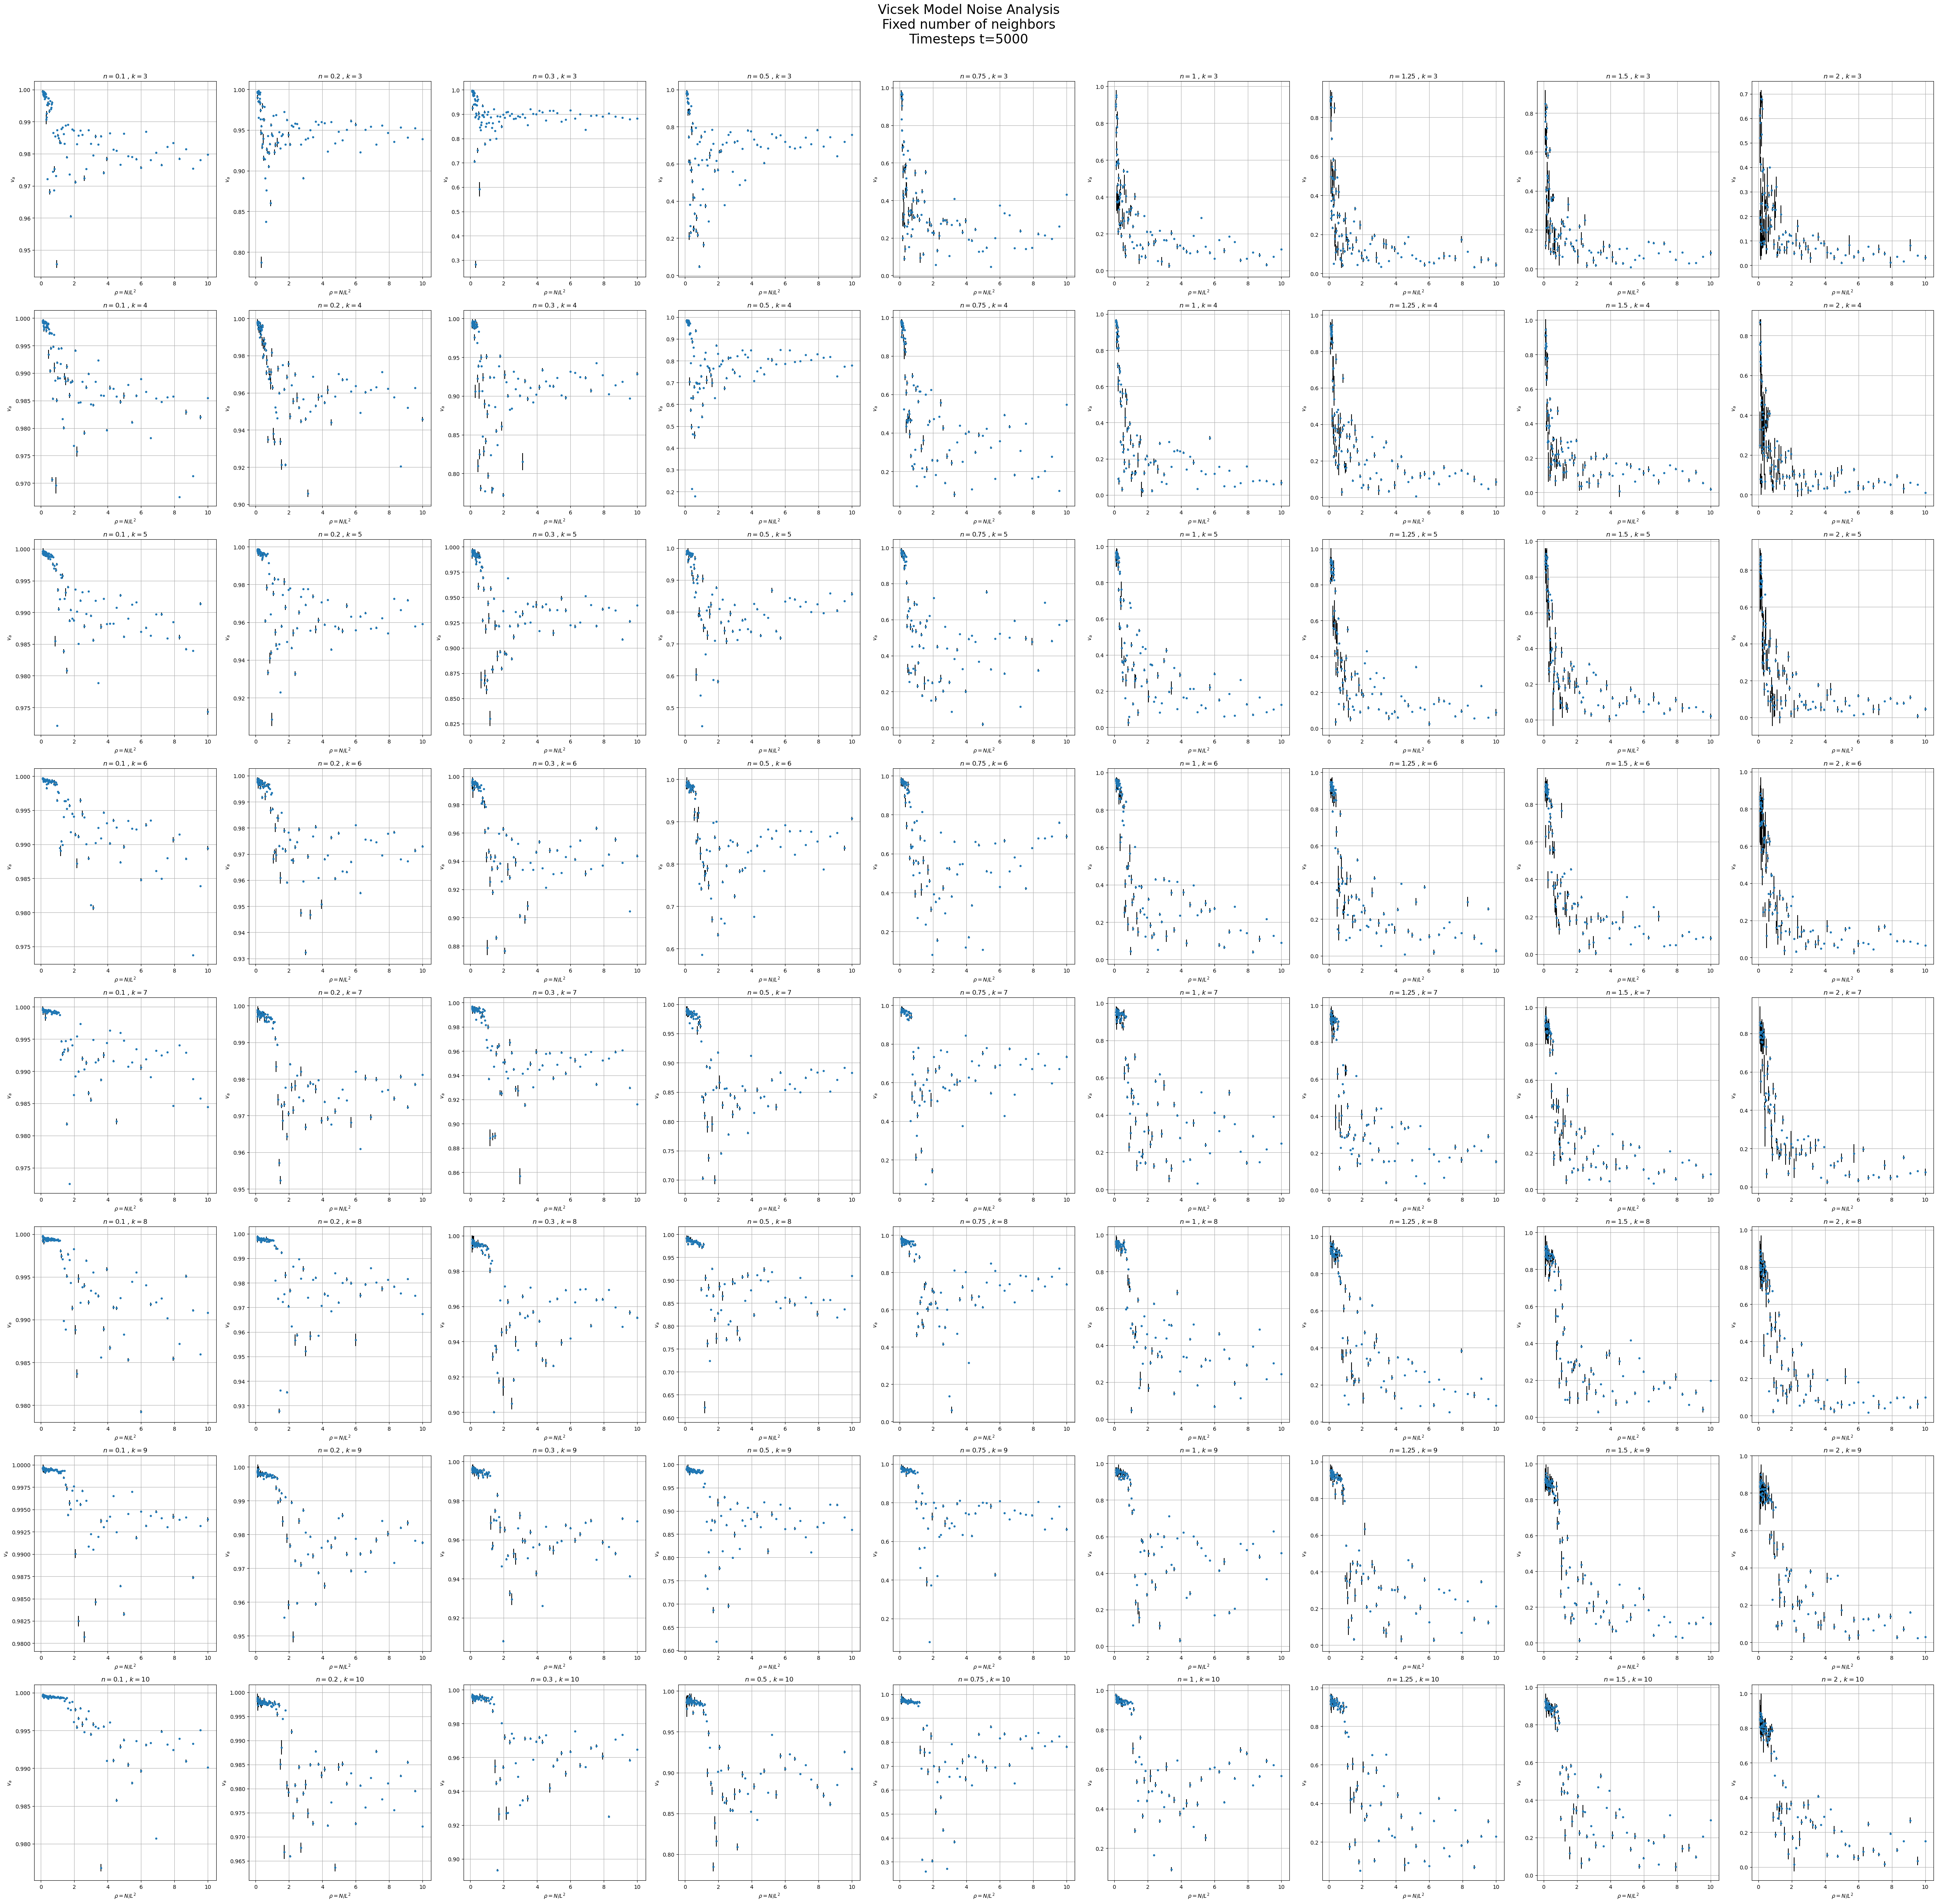

In [37]:
import numpy as np
import matplotlib.pyplot as plt

noises = [0.1, 0.2, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 2]
k_values = [3, 4, 5, 6, 7, 8, 9, 10]

fig, axs = plt.subplots(len(k_values), len(noises), figsize=(50, 50))
fig.suptitle("Vicsek Model Noise Analysis\nFixed number of neighbors\nTimesteps t=5000", fontsize=24)

for j, k in enumerate(k_values):
    for i, noise in enumerate(noises):
        # Create the file name based on the noise value
        filename = f"../../data/VicsekModel/Fig2b/Fig2b_kNeighbors_n{noise}_k{k}_t5000.txt"
        
        n,t,va,prev = np.genfromtxt(filename, delimiter=',', unpack=True, skip_header=True)

        # Linear scale plot
        axs[j, i].errorbar(n / (20**2), va, prev, ecolor="black", fmt=".")
        axs[j, i].set_xlabel(r"$\rho = N / L^2$")
        axs[j, i].set_ylabel(r"$v_a$")
        axs[j, i].grid()
        axs[j, i].set_title(rf"$n = {noise}$ , $k = {k}$")

# Adjust spacing
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig("../../plots/VicsekNoise_kNeighbors.pdf")
plt.show()


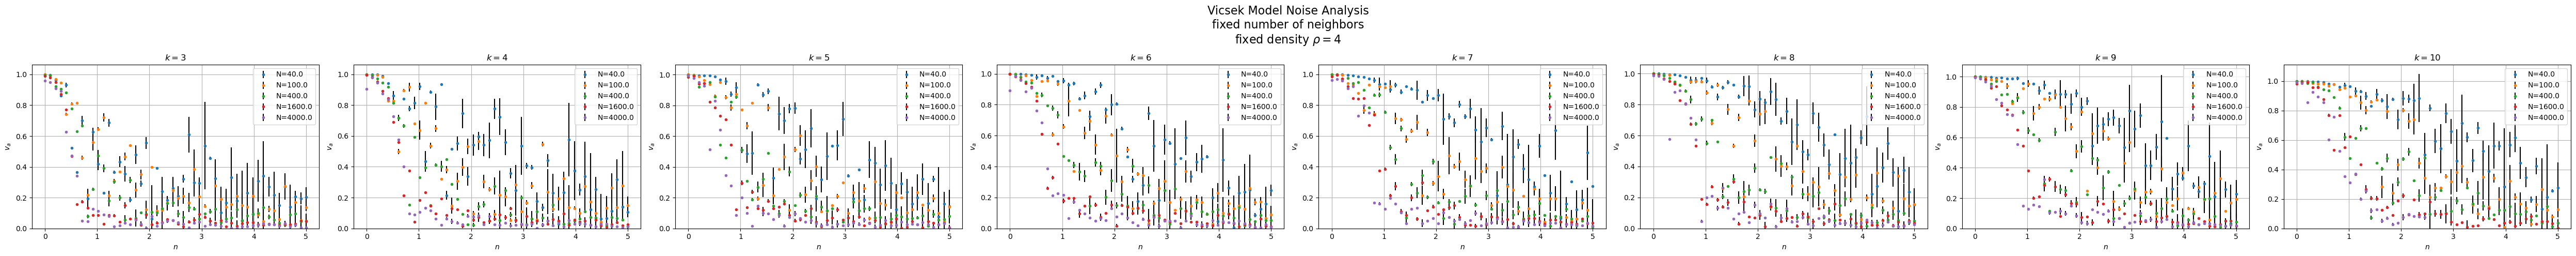

In [54]:
import numpy as np
import matplotlib.pyplot as plt

k_values = [3, 4, 5, 6, 7, 8, 9, 10]

fig, axs = plt.subplots(1, len(k_values), figsize=(50, 5))
fig.suptitle("Vicsek Model Noise Analysis\nfixed number of neighbors\n" + r"fixed density $\rho = 4$", fontsize=16)

# Define a list of colors to distinguish between the particle groups
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

for j, k in enumerate(k_values):
    # Create the file name based on the k value
    filename = f"../../data/VicsekModel/Fig2a/Fig2a_kNeighbors__k{k}_t2000.txt"
    
    N, n, t, va, prev = np.genfromtxt(filename, delimiter=',', unpack=True, skip_header=True)

    # Group by N
    unique_N = np.unique(N)
    for index, N_value in enumerate(unique_N):
        mask = N == N_value
        axs[j].errorbar(n[mask], va[mask], prev[mask], ecolor="black", fmt=".", color=colors[index % len(colors)], label=f'N={N_value}')
    
    axs[j].set_xlabel(r"$n$")
    axs[j].set_ylabel(r"$v_a$")
    axs[j].set_ylim(0)
    axs[j].grid()
    axs[j].set_title(rf"$k = {k}$")
    axs[j].legend()

# Adjust spacing
fig.tight_layout()
fig.subplots_adjust(top=0.75)
plt.savefig("../../plots/VicsekNoise_noises.pdf")
plt.show()


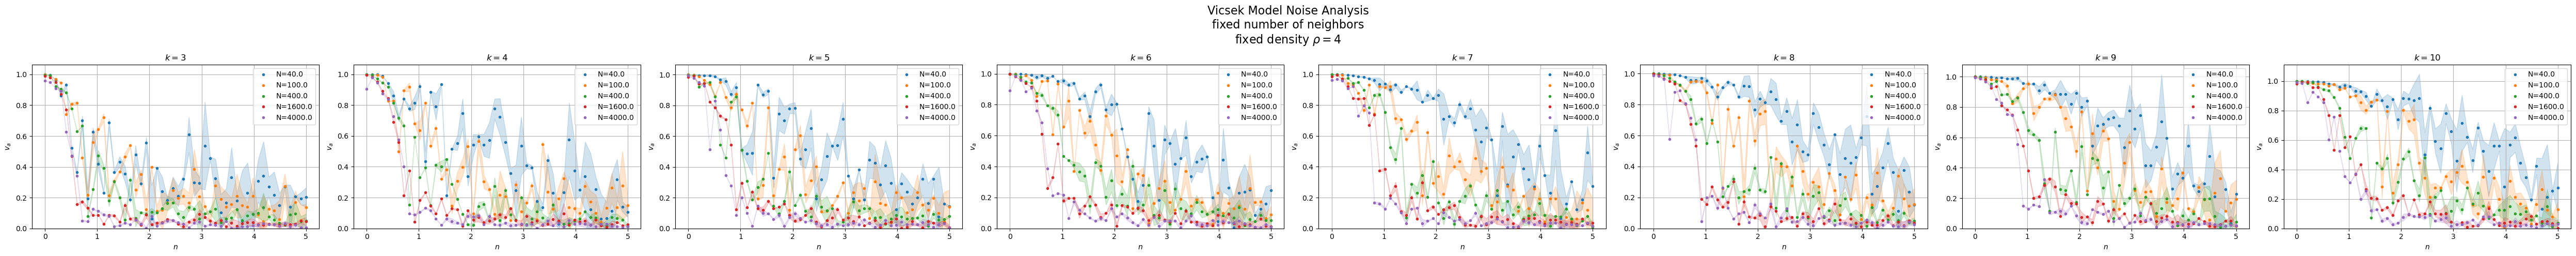

In [55]:
import numpy as np
import matplotlib.pyplot as plt

k_values = [3, 4, 5, 6, 7, 8, 9, 10]

fig, axs = plt.subplots(1, len(k_values), figsize=(50, 5))
fig.suptitle("Vicsek Model Noise Analysis\nfixed number of neighbors\n" + r"fixed density $\rho = 4$", fontsize=16)

# Define a list of colors to distinguish between the particle groups
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

for j, k in enumerate(k_values):
    # Create the file name based on the k value
    filename = f"../../data/VicsekModel/Fig2a/Fig2a_kNeighbors__k{k}_t2000.txt"
    
    N, n, t, va, prev = np.genfromtxt(filename, delimiter=',', unpack=True, skip_header=True)

    # Group by N
    unique_N = np.unique(N)
    for index, N_value in enumerate(unique_N):
        mask = N == N_value
        color = colors[index % len(colors)]
        axs[j].plot(n[mask], va[mask], ".", color=color, label=f'N={N_value}')
        axs[j].fill_between(n[mask], va[mask] - prev[mask], va[mask] + prev[mask], color=color, alpha=0.2)
    
    axs[j].set_xlabel(r"$n$")
    axs[j].set_ylabel(r"$v_a$")
    axs[j].set_ylim(0)
    axs[j].grid()
    axs[j].set_title(rf"$k = {k}$")
    axs[j].legend()

# Adjust spacing
fig.tight_layout()
fig.subplots_adjust(top=0.75)
plt.savefig("../../plots/VicsekNoise_noisesFill.pdf")
plt.show()


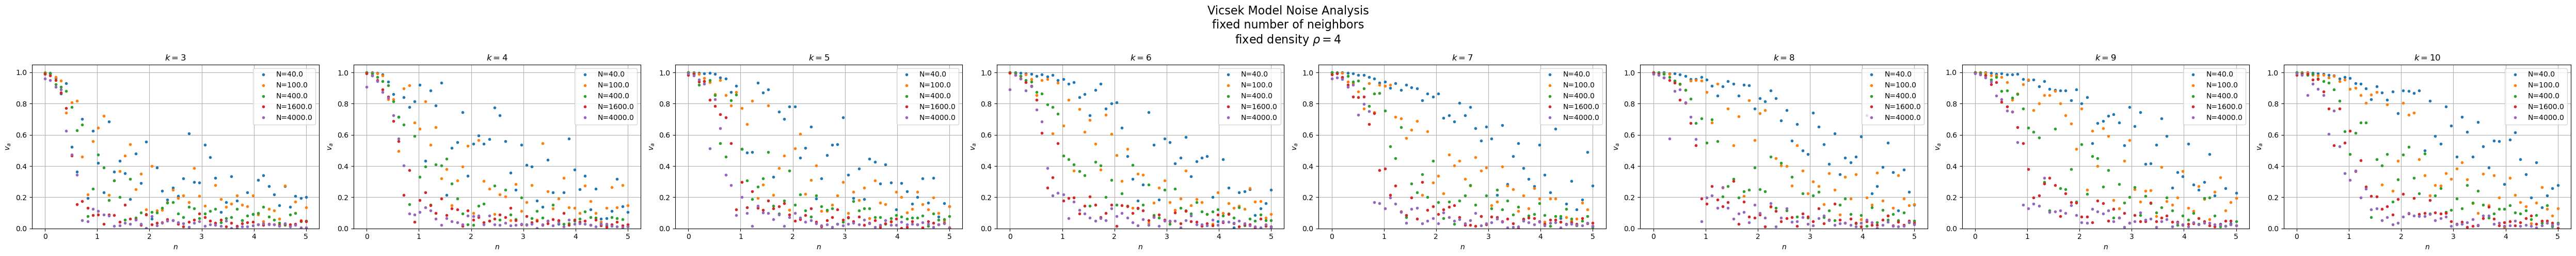

In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.close()

k_values = [3, 4, 5, 6, 7, 8, 9, 10]

fig, axs = plt.subplots(1, len(k_values), figsize=(50, 5))
fig.suptitle("Vicsek Model Noise Analysis\nfixed number of neighbors\n" + r"fixed density $\rho = 4$", fontsize=16)

# Define a list of colors to distinguish between the particle groups
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

for j, k in enumerate(k_values):
    # Create the file name based on the k value
    filename = f"../../data/VicsekModel/Fig2a/Fig2a_kNeighbors__k{k}_t2000.txt"
    
    N, n, t, va, prev = np.genfromtxt(filename, delimiter=',', unpack=True, skip_header=True)

    # Group by N
    unique_N = np.unique(N)
    for index, N_value in enumerate(unique_N):
        mask = N == N_value
        color = colors[index % len(colors)]
        axs[j].plot(n[mask], va[mask], ".", color=color, label=f'N={N_value}')
    
    axs[j].set_xlabel(r"$n$")
    axs[j].set_ylabel(r"$v_a$")
    axs[j].set_ylim(0)
    axs[j].grid()
    axs[j].set_title(rf"$k = {k}$")
    axs[j].legend()

# Adjust spacing
fig.tight_layout()
fig.subplots_adjust(top=0.75)
plt.savefig("../../plots/VicsekNoise_noisesPlain.pdf")
plt.show()

# Radial histogram

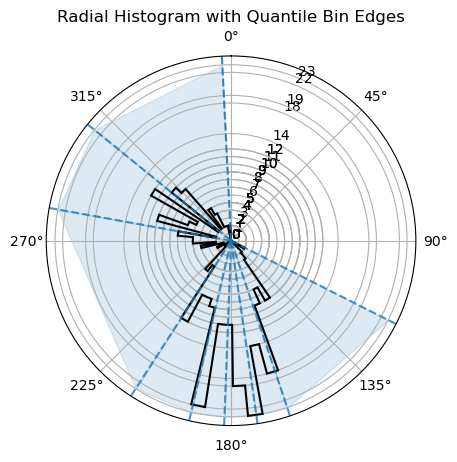

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create a normal distribution with values ranging from 0 to 2pi
mu = np.pi  # Mean of the distribution
sigma = np.pi / 8  # Standard deviation of the distribution
values = np.random.normal(mu, sigma, 200)

# Create a second normal distribution offset by 120 degrees
offset = np.radians(120)  # Offset in radians
sigma2 = np.pi / 4  # Standard deviation of the distribution
values2 = np.random.normal(mu + offset, sigma, 100)

# Constrain the values to the range [0, 2pi]
values = np.mod(values, 2 * np.pi)
values2 = np.mod(values2, 2 * np.pi)

# Combine the two distributions
values = np.concatenate([values, values2])

# Create the polar coordinate axes
ax = plt.subplot(111, polar=True)

# Calculate quantile bin edges
n_bins = 8  # Number of bins
quantiles = np.linspace(0, 100, n_bins+1)  # Quantile edges
quantile_bin_edges = np.percentile(values, quantiles)  # Convert quantiles to data values
quantile_bin_edges[-1] += 1e-6  # Ensure last bin edge is greater than largest data value

# Create a histogram with equal bin widths
n_equal_bins = 50  # Number of bins for the equal-width histogram
n, bin_edges, _ = ax.hist(values, bins=n_equal_bins, histtype="step", linewidth=1.5, edgecolor='black')

# Set the y axis label to the count of the bins
ax.set_yticks(n)

# Adjust axes
ax.set_aspect('equal')
ax.set_theta_zero_location('N')  # Set 0 degrees to the top position
ax.set_theta_direction(-1)  # Angles are represented clockwise

plt.title("Radial Histogram with Quantile Bin Edges")
plt.savefig("RadialHistogram_plain.pdf")


# Add vertical lines for the quantile-based bin edges and fill between them
for i in range(len(quantile_bin_edges)-1):
    ax.axvline(quantile_bin_edges[i], color='C0', linestyle='--', alpha=0.8)
    if i+1 < len(quantile_bin_edges):
        ax.fill_between([quantile_bin_edges[i], quantile_bin_edges[i+1]], 0, np.max(n), color='C0', alpha=0.15)


# Draw the last line
ax.axvline(quantile_bin_edges[-1], color='C0', linestyle='--', alpha=0.9)

plt.savefig("RadialHistogram_quantile.pdf")
plt.show()

# Radial Histogram Animation

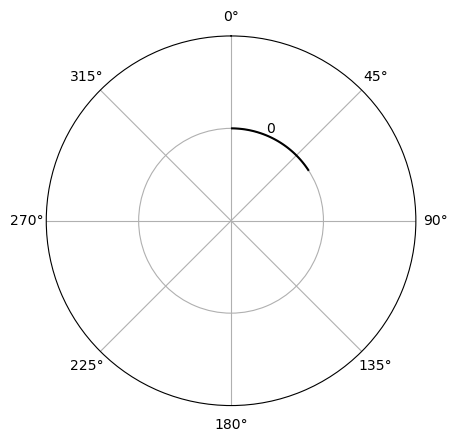

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a normal distribution with values ranging from 0 to 2pi
mu = np.pi  # Mean of the distribution
sigma = np.pi / 8  # Standard deviation of the distribution
values = np.random.normal(mu, sigma, 200)

# Create a second normal distribution offset by 120 degrees
offset = np.radians(120)  # Offset in radians
sigma2 = np.pi / 4  # Standard deviation of the distribution
values2 = np.random.normal(mu + offset, sigma, 100)

# Constrain the values to the range [0, 2pi]
values = np.mod(values, 2 * np.pi)
values2 = np.mod(values2, 2 * np.pi)

# Combine the two distributions
values = np.concatenate([values, values2])
np.random.shuffle(values)

# Create the polar coordinate axes
fig, ax = plt.subplots(subplot_kw={'polar': True})

n_equal_bins = 50  # Number of bins for the equal-width histogram
n_bins = 8  # Number of bins

# Set the y axis label to the count of the bins
ax.set_yticks(np.arange(0, n_equal_bins, 10))

# Adjust axes
ax.set_aspect('equal')
ax.set_theta_zero_location('N')  # Set 0 degrees to the top position
ax.set_theta_direction(-1)  # Angles are represented clockwise

plt.title("Radial Histogram with Quantile Bin Edges")

def animate(i):
    ax.clear()
    ax.set_yticks(np.arange(0, n_equal_bins, 10))
    ax.set_aspect('equal')
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)

    if i == 0:
        n, bin_edges, _ = ax.hist([], bins=n_equal_bins, histtype="step", linewidth=1.5, edgecolor='black')
    else:
        n, bin_edges, _ = ax.hist(values[:i], bins=n_equal_bins, histtype="step", linewidth=1.5, edgecolor='black')
    
    if i > n_bins:
        quantiles = np.linspace(0, 100, n_bins+1)  # Quantile edges
        quantile_bin_edges = np.percentile(values[:i], quantiles)  # Convert quantiles to data values
        quantile_bin_edges[-1] += 1e-6  # Ensure last bin edge is greater than largest data value

        # Add vertical lines for the quantile-based bin edges and fill between them
        for j in range(len(quantile_bin_edges)-1):
            ax.axvline(quantile_bin_edges[j], color='C0', linestyle='--', alpha=0.8)
            if j+1 < len(quantile_bin_edges):
                ax.fill_between([quantile_bin_edges[j], quantile_bin_edges[j+1]], 0, np.max(n), color='C0', alpha=0.15)
        
        # Draw the last line
        ax.axvline(quantile_bin_edges[-1], color='C0', linestyle='--', alpha=0.9)

ani = animation.FuncAnimation(fig, animate, frames=len(values), repeat=False)

ani.save('RadialHistogram.mp4', writer='ffmpeg', fps=1, dpi=300)
